In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
import copy
%matplotlib inline

In [2]:
df = pd.read_csv(r'../data/snp_allstocks_2015_2019.csv')
df = df.set_index('Date')

info = pd.read_csv(r'../data/snp_info.csv')
info.drop(columns = info.columns[0], inplace = True)

In [3]:
tickers = ['CAG', 'MAR', 'LIN', 'HCP', 'MAT']
stocks = df[tickers]
stocks_ma = stocks.rolling(window = 66).mean()
stocks_detrended = stocks.sub(stocks_ma).dropna()

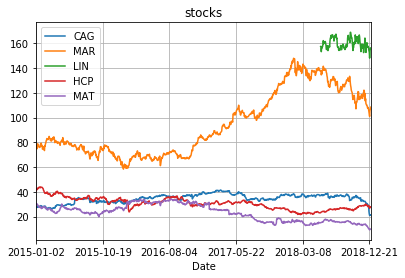

<Figure size 432x288 with 0 Axes>

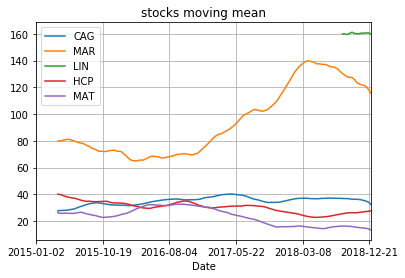

<Figure size 432x288 with 0 Axes>

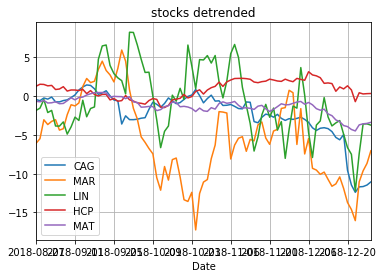

In [4]:
stocks.plot()
plt.title("stocks")
plt.grid()
plt.savefig("../result/1_3_4_a.png")

plt.figure()
stocks_ma.plot()
plt.title("stocks moving mean")
plt.grid()
plt.savefig("../result/1_3_4_b.png")

plt.figure()
stocks_detrended.plot()
plt.title("stocks detrended")
plt.grid()
plt.savefig("../result/1_3_4_c.png")


In [5]:
model = VAR(stocks_detrended)
results = model.fit(1)
A = results.params[1:].values
eigA, _ = np.linalg.eig(A)

abs(eigA)

C:\Users\thtan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


array([0.72609393, 0.72609393, 1.00635964, 0.86051894, 0.91144512])

In [6]:
for sector in info['GICS Sector'].unique():
    tickers = info.loc[info['GICS Sector'] == sector]['Symbol'].tolist()
    stocks = df[tickers]
    
stocks_ma = stocks.rolling(window = 66).mean()
stocks_detrended = stocks.sub(stocks_ma).dropna()

corr_mat = stocks_detrended.corr()

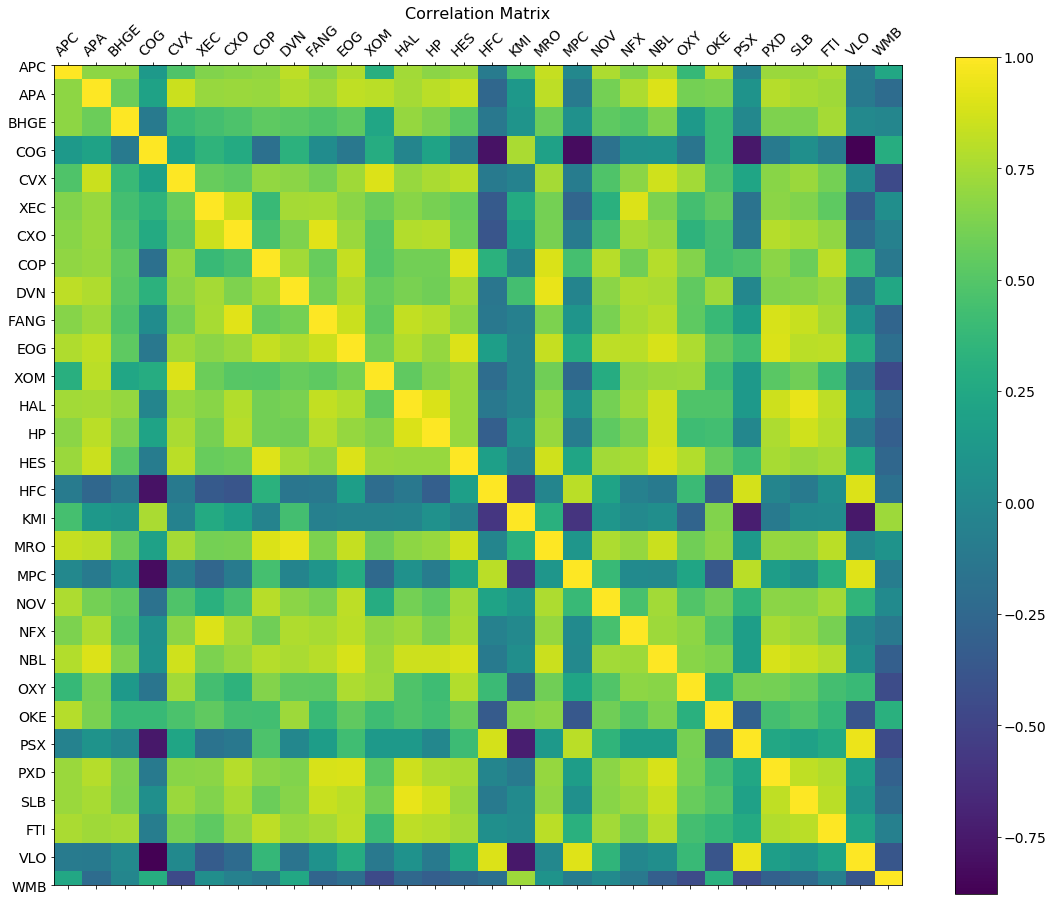

In [7]:
f = plt.figure(figsize=(19, 15))
# f = plt.figure()
plt.matshow(corr_mat.corr(), fignum=f.number)
plt.xticks(range(corr_mat.shape[1]), corr_mat.columns, fontsize=14, rotation=45)
plt.yticks(range(corr_mat.shape[1]), corr_mat.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.savefig("../result/1_3_5_a.png")